In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip -u "/content/drive/My Drive/dub2_data.zip" -d "/content/drive/My Drive/dub2_projekt"

In [5]:
from scipy import ndimage
from matplotlib.pyplot import imshow
import torch
from torchvision import transforms
from faces_dataset import FacesDataset
from torch.utils.data import Subset
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from tqdm import tqdm
from networks import Generator, Discriminator

from PIL import Image
import numpy as np

def show_img(x):
    imshow(x.permute(1,2,0))

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [2]:
#!git clone https://TOKEN@github.com/mperic7/du2_projekt duboko_projekt

#data

In [3]:
from drive.MyDrive.duboko_projekt import faces_dataset, pickle_images2

ModuleNotFoundError: No module named 'drive'

In [64]:
#%run -i 'drive/MyDrive/duboko_projekt/pickle_images2.py'
# from drive.MyDrive.duboko_projekt.faces_dataset import FacesDataset
# dataset_x = FacesDataset("/content/drive/MyDrive/duboko_projekt/dub2_data/subset_1000/pickled/celeba_hq_256", transform=transforms.ToTensor())
# dataset_y = FacesDataset("/content/drive/MyDrive/duboko_projekt/dub2_data/subset_1000/pickled/avg_blurred_images", transform=transforms.ToTensor())

dataset_x = FacesDataset("dub2_data\\pickled\\celeba_hq_256", transform=transforms.ToTensor())
# dataset_avg_blurr = FacesDataset("dub2_data\\pickled\\avg_blurred_images", transform=transforms.ToTensor())
dataset_avg_blurr = FacesDataset("pickled\\avg_blurred_images", transform=transforms.ToTensor())
# dataset_gauss_blurr = FacesDataset("dub2_data\\pickled\\gauss_blurred_images", transform=transforms.ToTensor())
# dataset_y = torch.utils.data.ConcatDataset([dataset_avg_blurr, dataset_gauss_blurr])
dataset_y = dataset_avg_blurr

In [76]:
train_val_split = 0.99
split = int(train_val_split * len(dataset_x))
dataset_x_test = Subset(dataset_x, range(split, len(dataset_x)))
dataset_x = Subset(dataset_x, range(split))

dataset_y_test = Subset(dataset_y, range(split, len(dataset_y)))
dataset_y = Subset(dataset_y, range(split))

In [56]:
dataloader_x = DataLoader(dataset_x, batch_size=128, shuffle=True)
dataloader_y = DataLoader(dataset_y, batch_size=128, shuffle=True)

In [15]:
# from drive.MyDrive.duboko_projekt.networks import Generator, Discriminator

ModuleNotFoundError: No module named 'drive'

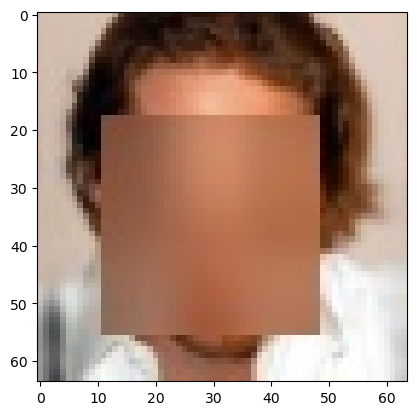

In [6]:
s = next(iter(dataloader_y))#.shape
show_img(s[0])

#training

In [136]:
gen_x = Generator(3, num_features=32)
gen_y = Generator(3, num_features=32)

disc_x = Discriminator(3, features=[64, 128, 256, 512])
disc_y = Discriminator(3, features=[64, 128, 256, 512])

In [8]:
pytorch_total_params = sum(p.numel() for p in gen_x.parameters() if p.requires_grad)
pytorch_total_params

1965059

In [10]:
gen_x = gen_x.to(device)
disc_x = disc_x.to(device)

gen_y = gen_y.to(device)
disc_y = disc_y.to(device)

In [11]:
gen_x.load_state_dict(torch.load('models\\gen_x_ckpt_lambda10_final.pt'))
gen_y.load_state_dict(torch.load('models\\gen_y_ckpt_lambda10_final.pt'))

<All keys matched successfully>

Epoha 0


100%|██████████| 232/232 [02:49<00:00,  1.37it/s, CYCLE_LOSS=0.691]


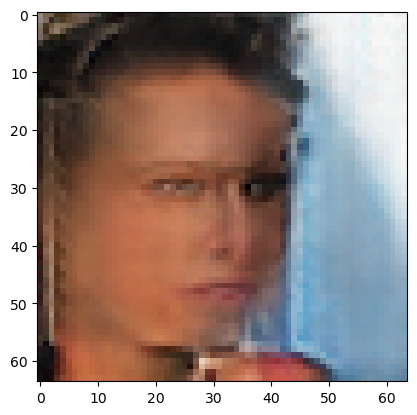

Epoha 1


100%|██████████| 232/232 [02:46<00:00,  1.39it/s, CYCLE_LOSS=0.572]


Epoha 2


100%|██████████| 232/232 [02:45<00:00,  1.40it/s, CYCLE_LOSS=0.569]


Epoha 3


100%|██████████| 232/232 [02:46<00:00,  1.40it/s, CYCLE_LOSS=0.545]


Epoha 4


100%|██████████| 232/232 [02:45<00:00,  1.40it/s, CYCLE_LOSS=0.485]


Epoha 5


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.512]


Epoha 6


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.548]


Epoha 7


100%|██████████| 232/232 [02:45<00:00,  1.40it/s, CYCLE_LOSS=0.599]


Epoha 8


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.55] 


Epoha 9


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.581]


Epoha 10


100%|██████████| 232/232 [02:45<00:00,  1.40it/s, CYCLE_LOSS=0.613]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


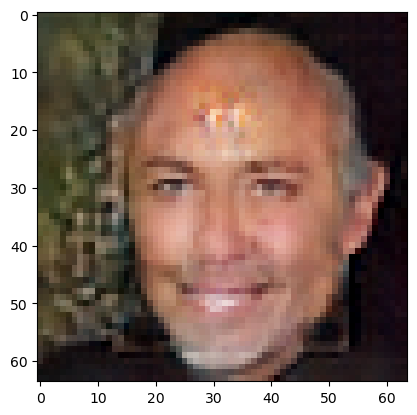

Epoha 11


100%|██████████| 232/232 [02:45<00:00,  1.40it/s, CYCLE_LOSS=0.441]


Epoha 12


100%|██████████| 232/232 [02:46<00:00,  1.39it/s, CYCLE_LOSS=0.494]


Epoha 13


100%|██████████| 232/232 [02:46<00:00,  1.39it/s, CYCLE_LOSS=0.483]


Epoha 14


100%|██████████| 232/232 [02:46<00:00,  1.40it/s, CYCLE_LOSS=0.433]


Epoha 15


100%|██████████| 232/232 [02:46<00:00,  1.39it/s, CYCLE_LOSS=0.508]


Epoha 16


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.51] 


Epoha 17


100%|██████████| 232/232 [02:47<00:00,  1.38it/s, CYCLE_LOSS=0.531]


Epoha 18


100%|██████████| 232/232 [02:47<00:00,  1.39it/s, CYCLE_LOSS=0.58] 


Epoha 19


100%|██████████| 232/232 [02:46<00:00,  1.39it/s, CYCLE_LOSS=0.538]


Epoha 20


100%|██████████| 232/232 [02:52<00:00,  1.35it/s, CYCLE_LOSS=0.523]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


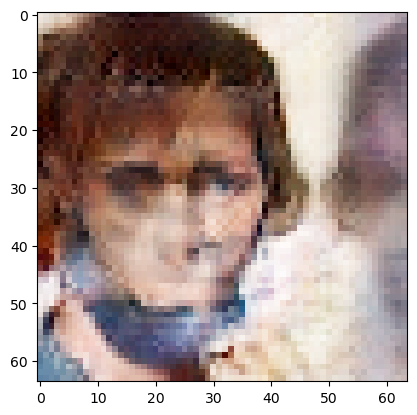

Epoha 21


100%|██████████| 232/232 [02:55<00:00,  1.32it/s, CYCLE_LOSS=0.522]


Epoha 22


100%|██████████| 232/232 [02:55<00:00,  1.32it/s, CYCLE_LOSS=0.442]


Epoha 23


100%|██████████| 232/232 [02:48<00:00,  1.38it/s, CYCLE_LOSS=0.489]


Epoha 24


100%|██████████| 232/232 [02:45<00:00,  1.40it/s, CYCLE_LOSS=0.478]


Epoha 25


100%|██████████| 232/232 [02:46<00:00,  1.39it/s, CYCLE_LOSS=0.52] 


Epoha 26


100%|██████████| 232/232 [02:45<00:00,  1.40it/s, CYCLE_LOSS=0.488]


Epoha 27


100%|██████████| 232/232 [02:46<00:00,  1.40it/s, CYCLE_LOSS=0.466]


Epoha 28


100%|██████████| 232/232 [02:46<00:00,  1.39it/s, CYCLE_LOSS=0.52] 


Epoha 29


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.506]


Epoha 30


100%|██████████| 232/232 [02:45<00:00,  1.40it/s, CYCLE_LOSS=0.487]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


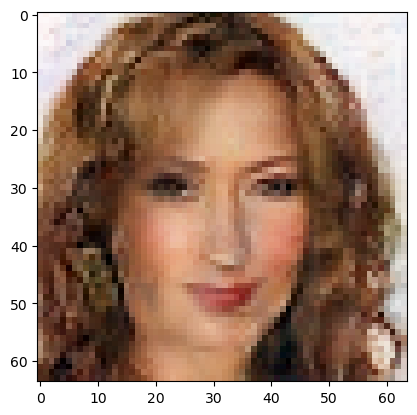

Epoha 31


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.512]


Epoha 32


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.439]


Epoha 33


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.475]


Epoha 34


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.456]


Epoha 35


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.562]


Epoha 36


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.48] 


Epoha 37


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.506]


Epoha 38


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.453]


Epoha 39


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.427]


Epoha 40


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.506]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


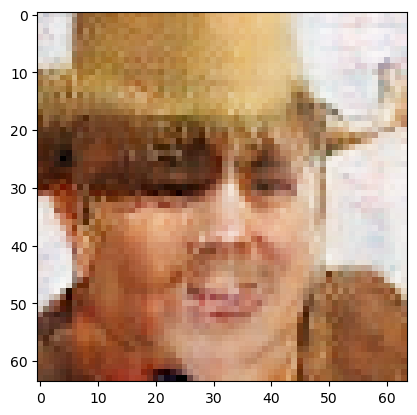

Epoha 41


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.472]


Epoha 42


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.434]


Epoha 43


100%|██████████| 232/232 [02:42<00:00,  1.43it/s, CYCLE_LOSS=0.472]


Epoha 44


100%|██████████| 232/232 [02:42<00:00,  1.43it/s, CYCLE_LOSS=0.627]


Epoha 45


100%|██████████| 232/232 [02:42<00:00,  1.43it/s, CYCLE_LOSS=0.437]


Epoha 46


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.506]


Epoha 47


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.449]


Epoha 48


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.512]


Epoha 49


100%|██████████| 232/232 [02:42<00:00,  1.43it/s, CYCLE_LOSS=0.489]


Epoha 50


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.563]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


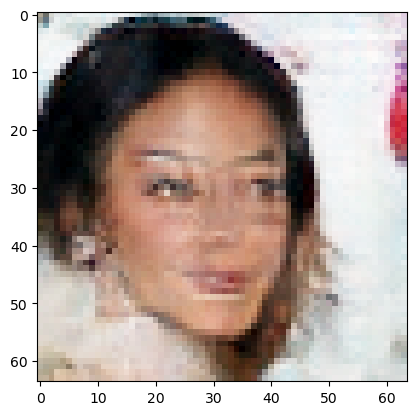

Epoha 51


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.507]


Epoha 52


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.543]


Epoha 53


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.524]


Epoha 54


100%|██████████| 232/232 [02:42<00:00,  1.43it/s, CYCLE_LOSS=0.475]


Epoha 55


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.448]


Epoha 56


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.444]


Epoha 57


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.547]


Epoha 58


100%|██████████| 232/232 [02:42<00:00,  1.43it/s, CYCLE_LOSS=0.542]


Epoha 59


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.503]


Epoha 60


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.421]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


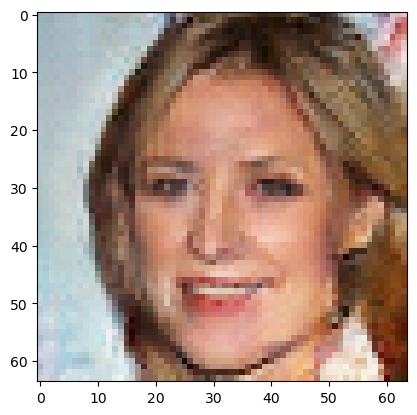

Epoha 61


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.637]


Epoha 62


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.407]


Epoha 63


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.416]


Epoha 64


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.534]


Epoha 65


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.451]


Epoha 66


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.576]


Epoha 67


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.518]


Epoha 68


100%|██████████| 232/232 [02:42<00:00,  1.43it/s, CYCLE_LOSS=0.462]


Epoha 69


100%|██████████| 232/232 [02:42<00:00,  1.43it/s, CYCLE_LOSS=0.503]


Epoha 70


100%|██████████| 232/232 [02:42<00:00,  1.43it/s, CYCLE_LOSS=0.455]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


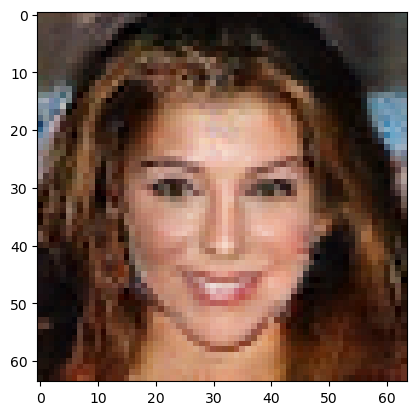

Epoha 71


100%|██████████| 232/232 [02:43<00:00,  1.42it/s, CYCLE_LOSS=0.451]


Epoha 72


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.489]


Epoha 73


100%|██████████| 232/232 [02:49<00:00,  1.37it/s, CYCLE_LOSS=0.47] 


Epoha 74


100%|██████████| 232/232 [02:48<00:00,  1.37it/s, CYCLE_LOSS=0.478]


Epoha 75


100%|██████████| 232/232 [02:48<00:00,  1.37it/s, CYCLE_LOSS=0.48] 


Epoha 76


100%|██████████| 232/232 [02:48<00:00,  1.38it/s, CYCLE_LOSS=0.499]


Epoha 77


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.498]


Epoha 78


100%|██████████| 232/232 [02:47<00:00,  1.38it/s, CYCLE_LOSS=0.459]


Epoha 79


100%|██████████| 232/232 [02:46<00:00,  1.39it/s, CYCLE_LOSS=0.455]


Epoha 80


100%|██████████| 232/232 [02:46<00:00,  1.40it/s, CYCLE_LOSS=0.52] 
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


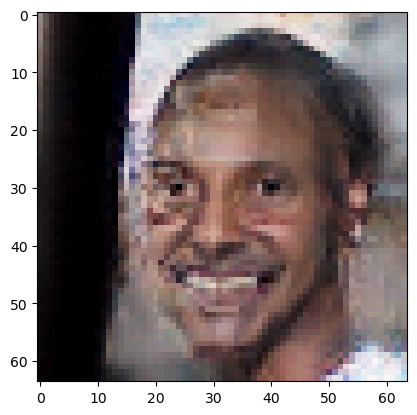

Epoha 81


100%|██████████| 232/232 [02:48<00:00,  1.38it/s, CYCLE_LOSS=0.517]


Epoha 82


100%|██████████| 232/232 [02:45<00:00,  1.41it/s, CYCLE_LOSS=0.449]


Epoha 83


100%|██████████| 232/232 [02:46<00:00,  1.39it/s, CYCLE_LOSS=0.447]


Epoha 84


100%|██████████| 232/232 [02:48<00:00,  1.38it/s, CYCLE_LOSS=0.477]


Epoha 85


100%|██████████| 232/232 [02:47<00:00,  1.38it/s, CYCLE_LOSS=0.5]  


Epoha 86


100%|██████████| 232/232 [02:47<00:00,  1.39it/s, CYCLE_LOSS=0.499]


Epoha 87


100%|██████████| 232/232 [02:47<00:00,  1.38it/s, CYCLE_LOSS=0.547]


Epoha 88


100%|██████████| 232/232 [02:48<00:00,  1.37it/s, CYCLE_LOSS=0.444]


Epoha 89


100%|██████████| 232/232 [02:48<00:00,  1.38it/s, CYCLE_LOSS=0.452]


Epoha 90


100%|██████████| 232/232 [02:48<00:00,  1.38it/s, CYCLE_LOSS=0.475]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


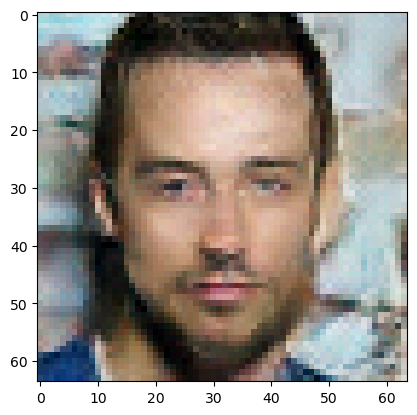

Epoha 91


100%|██████████| 232/232 [02:47<00:00,  1.38it/s, CYCLE_LOSS=0.511]


Epoha 92


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.462]


Epoha 93


100%|██████████| 232/232 [02:45<00:00,  1.40it/s, CYCLE_LOSS=0.513]


Epoha 94


100%|██████████| 232/232 [02:48<00:00,  1.37it/s, CYCLE_LOSS=0.426]


Epoha 95


100%|██████████| 232/232 [02:46<00:00,  1.39it/s, CYCLE_LOSS=0.51] 


Epoha 96


100%|██████████| 232/232 [02:42<00:00,  1.43it/s, CYCLE_LOSS=0.621]


Epoha 97


100%|██████████| 232/232 [02:48<00:00,  1.38it/s, CYCLE_LOSS=0.51] 


Epoha 98


100%|██████████| 232/232 [02:51<00:00,  1.35it/s, CYCLE_LOSS=0.446]


Epoha 99


100%|██████████| 232/232 [02:50<00:00,  1.36it/s, CYCLE_LOSS=0.5]  


Epoha 100


100%|██████████| 232/232 [02:51<00:00,  1.35it/s, CYCLE_LOSS=0.541]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


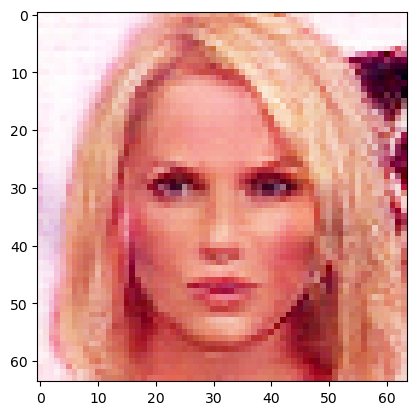

Epoha 101


100%|██████████| 232/232 [02:51<00:00,  1.35it/s, CYCLE_LOSS=0.457]


Epoha 102


100%|██████████| 232/232 [02:51<00:00,  1.35it/s, CYCLE_LOSS=0.485]


Epoha 103


100%|██████████| 232/232 [02:50<00:00,  1.36it/s, CYCLE_LOSS=0.459]


Epoha 104


100%|██████████| 232/232 [02:51<00:00,  1.35it/s, CYCLE_LOSS=0.496]


Epoha 105


100%|██████████| 232/232 [02:50<00:00,  1.36it/s, CYCLE_LOSS=0.466]


Epoha 106


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.491]


Epoha 107


100%|██████████| 232/232 [02:51<00:00,  1.35it/s, CYCLE_LOSS=0.517]


Epoha 108


100%|██████████| 232/232 [02:52<00:00,  1.35it/s, CYCLE_LOSS=0.728]


Epoha 109


100%|██████████| 232/232 [02:43<00:00,  1.42it/s, CYCLE_LOSS=0.511]


Epoha 110


100%|██████████| 232/232 [02:42<00:00,  1.43it/s, CYCLE_LOSS=0.513]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


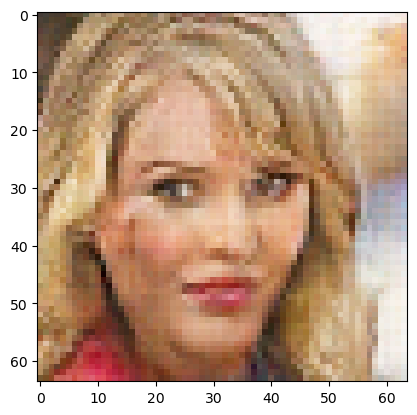

Epoha 111


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.508]


Epoha 112


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.544]


Epoha 113


100%|██████████| 232/232 [02:42<00:00,  1.43it/s, CYCLE_LOSS=0.488]


Epoha 114


100%|██████████| 232/232 [02:42<00:00,  1.43it/s, CYCLE_LOSS=0.45] 


Epoha 115


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.503]


Epoha 116


100%|██████████| 232/232 [02:41<00:00,  1.44it/s, CYCLE_LOSS=0.434]


Epoha 117


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.46] 


Epoha 118


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.474]


Epoha 119


100%|██████████| 232/232 [02:42<00:00,  1.43it/s, CYCLE_LOSS=0.454]


Epoha 120


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.46] 
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


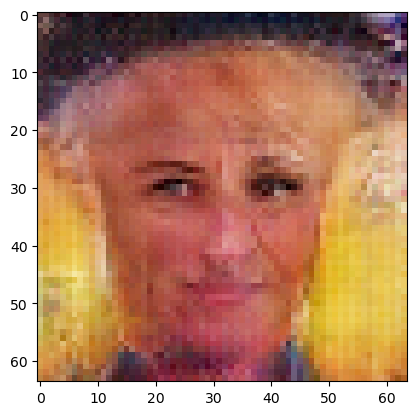

Epoha 121


100%|██████████| 232/232 [02:41<00:00,  1.43it/s, CYCLE_LOSS=0.519]


Epoha 122


100%|██████████| 232/232 [02:43<00:00,  1.42it/s, CYCLE_LOSS=0.47] 


Epoha 123


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.536]


Epoha 124


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.445]


Epoha 125


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.434]


Epoha 126


100%|██████████| 232/232 [02:43<00:00,  1.42it/s, CYCLE_LOSS=0.487]


Epoha 127


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.558]


Epoha 128


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.427]


Epoha 129


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.457]


Epoha 130


100%|██████████| 232/232 [02:43<00:00,  1.42it/s, CYCLE_LOSS=0.501]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


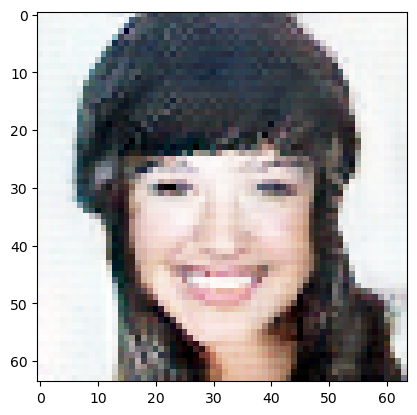

Epoha 131


100%|██████████| 232/232 [02:43<00:00,  1.42it/s, CYCLE_LOSS=0.481]


Epoha 132


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.516]


Epoha 133


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.495]


Epoha 134


100%|██████████| 232/232 [02:44<00:00,  1.41it/s, CYCLE_LOSS=0.536]


In [13]:
import torch
from matplotlib import pyplot as plt
import os
bce_loss = torch.nn.BCELoss()
l1_loss = torch.nn.L1Loss()

lambda_identity = 10
lambda_cycle = 10
epochs = 200
opt_disc = torch.optim.Adam(
        list(disc_x.parameters()) + list(disc_y.parameters()),
        lr=0.001,
        betas=(0.5, 0.999),
    )
opt_gen = torch.optim.Adam(
        list(gen_x.parameters()) + list(gen_y.parameters()),
        lr=0.001,
        betas=(0.5, 0.999),
    )

fig = plt.figure()
step = 0
for e in range(epochs):
    print("Epoha", e)
    pbar = tqdm(dataloader_x)
    for i, (x,y) in enumerate(zip(pbar, dataloader_y)):

        y = y[:x.shape[0]]

        opt_disc.zero_grad()
        opt_gen.zero_grad()

        x = x.to(device)
        y = y.to(device)


        fake_x = gen_x(y)
        disc_x_real = disc_x(x)
        dics_x_fake = disc_x(fake_x)

        fake_y = gen_y(x)
        disc_y_real = disc_y(y)
        dics_y_fake = disc_y(fake_y)

        identity_x = gen_x(x)
        identity_y = gen_y(y)

        cycle_y = gen_y(fake_x)


        #identity
        identity_loss = lambda_identity * (l1_loss(identity_x,x) + l1_loss(identity_y,y))
        #cycle
        cycle_loss = lambda_cycle * l1_loss(cycle_y,y)

        if step % 10 < 5: #update discriminator
            disc_x_gan_loss = bce_loss(disc_x_real, torch.ones_like(disc_x_real)) + bce_loss(dics_x_fake, torch.zeros_like(dics_x_fake))
            disc_y_gan_loss = bce_loss(disc_y_real, torch.ones_like(disc_y_real)) + bce_loss(dics_y_fake, torch.zeros_like(dics_y_fake))
            gan_loss = disc_x_gan_loss + disc_y_gan_loss

            disc_loss = gan_loss
            disc_loss.backward()
            opt_disc.step()

            #print(disc_loss)
        else: #update generator
            gen_x_gan_loss = bce_loss(disc_x_real, torch.zeros_like(disc_x_real)) + bce_loss(dics_x_fake, torch.ones_like(dics_x_fake))
            gen_y_gan_loss = bce_loss(disc_y_real, torch.zeros_like(disc_y_real)) + bce_loss(dics_y_fake, torch.ones_like(dics_y_fake))
            gan_loss = gen_x_gan_loss + gen_y_gan_loss
            gen_loss = gan_loss + identity_loss + cycle_loss
            gen_loss.backward()
            opt_gen.step()

            #print(gen_loss)

        pbar.set_postfix(CYCLE_LOSS=cycle_loss.item())
        # if step % 10 == 0:
        #     # print(gan_loss, identity_loss, cycle_loss)
        #     show_img(fake_x[0].cpu().detach())
        #     plt.show()
        #     torch.save(gen_x.state_dict(), os.path.join("models", "gen_x_ckpt.pt"))
        #     torch.save(gen_x.state_dict(), os.path.join("models", "gen_x_ckpt.pt"))
        step += 1

    if e % 10 == 0:
        show_img(fake_x[0].cpu().detach())
    plt.show()
    torch.save(gen_x.state_dict(), os.path.join("models", "gen_x_ckpt_lambda10_final.pt"))
    torch.save(gen_y.state_dict(), os.path.join("models", "gen_y_ckpt_lambda10_final.pt"))


In [19]:
SAVE_PATH = "/content/drive/MyDrive/duboko_projekt/dub2_data/subset_1000/"
torch.save(gen_x.state_dict(), SAVE_PATH + "gen_x.pth")
torch.save(gen_y.state_dict(), SAVE_PATH + "gen_y.pth")

torch.save(disc_x.state_dict(), SAVE_PATH + "disc_x.pth")
torch.save(disc_y.state_dict(), SAVE_PATH + "disc_y.pth")


In [71]:
gen_x.load_state_dict(torch.load('models\\gen_x_ckpt.pt'))
gen_y.load_state_dict(torch.load('models\\gen_y_ckpt.pt'))

<All keys matched successfully>

In [20]:
dataloader_x = DataLoader(dataset_x_test, batch_size=128, shuffle=False)
dataloader_y = DataLoader(dataset_y_test, batch_size=128, shuffle=False)

In [61]:
# dataloader_gauss = DataLoader(dataset_gauss_blurr, batch_size=128, shuffle=False)
dataloader_avg_blurr = DataLoader(dataset_avg_blurr, batch_size=128, shuffle=False)

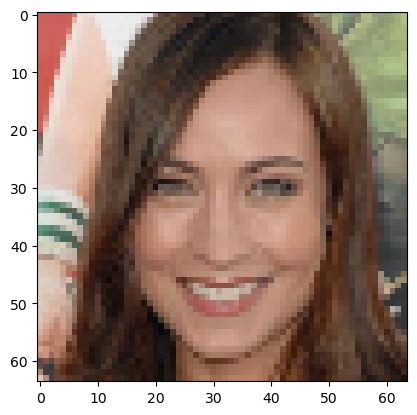

In [129]:
show_img(dataset_x[8911 + 12])

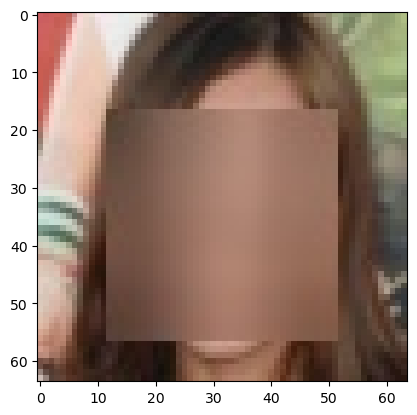

In [121]:
show_img(dataset_y[8911])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


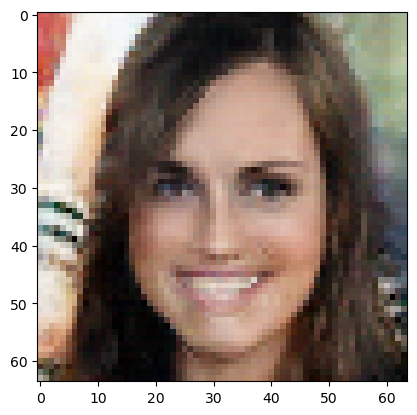

In [130]:
reconstructed = gen_x(dataset_y[8911].to(device))
show_img(reconstructed.detach().cpu())

In [133]:
save_image(dataset_x[8911 + 12], 'test_real.jpeg')
save_image(dataset_y[8911], 'test_blurred.jpeg')
save_image(reconstructed, 'test_reconstructed.jpeg')

## Od ovdje za isprobavanje

In [35]:
gen_x = Generator(3, num_features=32)
gen_y = Generator(3, num_features=32)

gen_x = gen_x.to(device)
gen_y = gen_y.to(device)

gen_x.load_state_dict(torch.load('models\\gen_x_ckpt_lambda10_final.pt'))
gen_y.load_state_dict(torch.load('models\\gen_y_ckpt_lambda10_final.pt'))

<All keys matched successfully>

In [36]:
dataset_x = FacesDataset("dub2_data\\pickled\\celeba_hq_256", transform=transforms.ToTensor())
dataset_avg_blurr = FacesDataset("dub2_data\\pickled\\avg_blurred_images", transform=transforms.ToTensor())
# dataset_gauss_blurr = FacesDataset("dub2_data\\pickled\\gauss_blurred_images", transform=transforms.ToTensor())
dataset_y = dataset_avg_blurr
# dataset_y = dataset_gauss_blurr

dataloader_x = DataLoader(dataset_x, batch_size=128, shuffle=False)
dataloader_y = DataLoader(dataset_y, batch_size=128, shuffle=False)

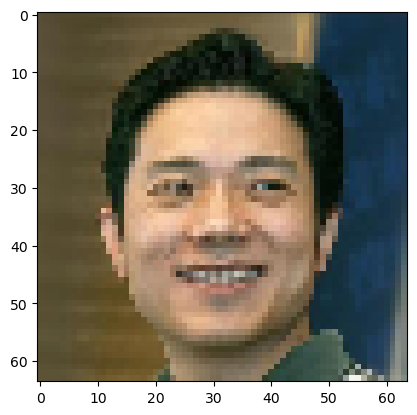

In [37]:
show_img(next(iter(dataloader_x))[0])

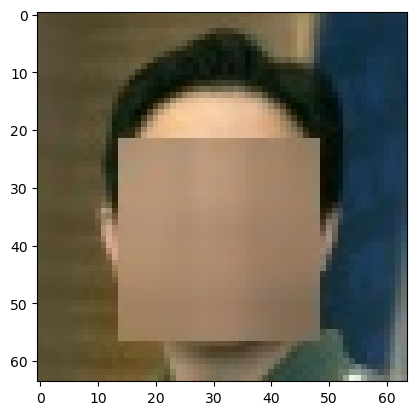

In [38]:
blurred = next(iter(dataloader_y))[0]
show_img(blurred)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


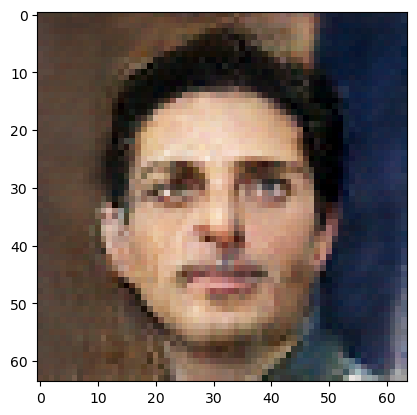

In [39]:
blurred = blurred.to(device)
fake = gen_x(blurred)
show_img(fake.detach().cpu())

### Primjer kada je slika vise zamucena sa avg_blur

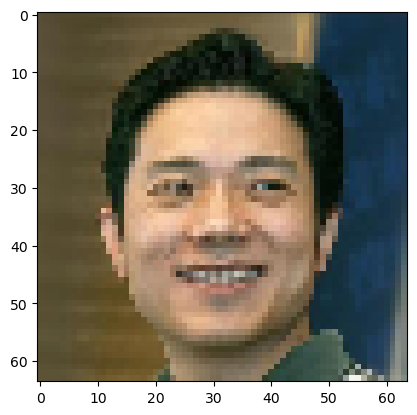

In [21]:
show_img(next(iter(dataloader_x))[0])

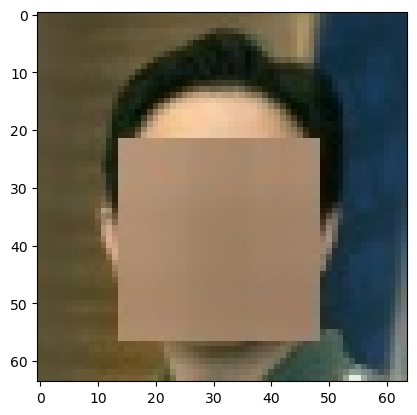

In [22]:
blurred = next(iter(dataloader_y))[0]
show_img(blurred)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


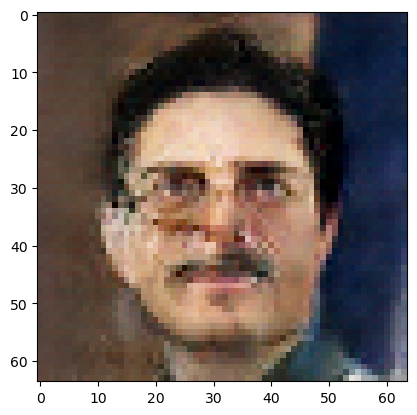

In [23]:
blurred = blurred.to(device)
fake = gen_x(blurred)
show_img(fake.detach().cpu())

## Testiranje ponovnog zamucenja generirane slike

In [40]:
import cv2
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)

In [41]:
img = fake.permute(1, 2, 0).detach()
H, W, _ = img.shape

img_rgb = np.array(np.round(img.cpu().numpy() * 255, decimals=2), dtype=np.uint8)
# img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2)
out = face_detection.process(img_rgb)

if out.detections is not None:
    for detection in out.detections:
        location_data = detection.location_data
        bbox = location_data.relative_bounding_box

        x1, y1, w, h = bbox.xmin, bbox.ymin, bbox.width, bbox.height

        x1 = int(x1 * W)
        y1 = int(y1 * H)
        w = int(w * W)
        h = int(h * H)

        # print(x1, y1, w, h)

        img_rgb[y1:y1 + h, x1:x1 + w, :] = cv2.GaussianBlur(img_rgb[y1:y1 + h, x1:x1 + w, :], (25, 25), 0)

In [42]:
img_rgb.shape

(64, 64, 3)

In [43]:
img_rgb = torch.tensor(img_rgb).permute(2, 0, 1)

In [44]:
img_rgb.shape

torch.Size([3, 64, 64])

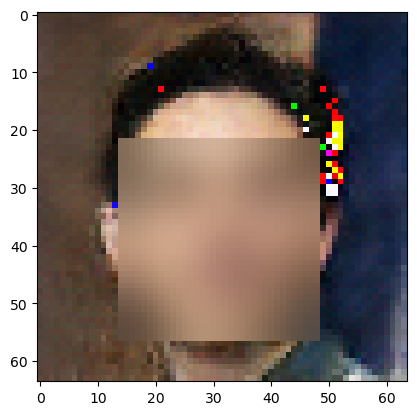

In [45]:
show_img(img_rgb)